# League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. 


### Step 1: Data Loading and Preprocessing  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. 
I've utilized `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

### Setup
Installing required libraries:

In [4]:
%%time
%pip install pandas scikit-learn matplotlib
%pip install torch==2.8.0+cpu torchvision==0.23.0+cpu torchaudio==2.8.0+cpu \
    --index-url https://download.pytorch.org/whl/cpu


Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.
CPU times: user 34.2 ms, sys: 40.8 ms, total: 75 ms
Wall time: 2.53 s


In [5]:
# Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset

# Load the datset as a dataframe
df = pd.read_csv('league_of_legends_data_large.csv')

# Get the features
X = df.drop('win', axis = 1)

# Get the target variable
y = df['win']
print(y.value_counts())

# Split the dataset into train and test splits, 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Perform preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the pandas dataframes into Tensors
X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype = torch.float32).view(-1, 1)


win
1    510
0    490
Name: count, dtype: int64


### Step 2: Logistic Regression Model  

1. Defined the Logistic Regression Model:</br>

2. Initialized the Model, Loss Function, and Optimizer

In [ ]:
# Create the logistic Regression class by subclassing nn.Module
import torch.nn as nn
import torch.optim as optim

input_dim = X_train.shape[1]
print('The number of input parameters are',input_dim)

class LogisticRegression(nn.Module):
    def __init__(self, input_units):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_units, 1)
        

    def forward(self, x):
        # Applies the sigmoid activation function after the linear transformation
        return torch.sigmoid(self.linear(x))
        

# Create the model
model = LogisticRegression(input_dim)

# Criterion or loss function
criterion = nn.BCELoss()

# The optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01)



The number of input parameters are 8


### Step 3: Model Training  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

In [7]:
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

epochs = 1000

for epoch in range(epochs):
    model.train()
    train_preds = []
    train_labels = []
    train_loss = 0

    for X_batch, y_batch in train_loader:
       
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)  # Ensure correct shape and dtype
        loss.backward()
        optimizer.step()


        train_loss += loss.item() * X_batch.size(0)  # sum loss over batch

        predicted = (outputs > 0.5).long()
        train_preds.extend(predicted.numpy())
        train_labels.extend(y_batch.numpy())

    train_acc = accuracy_score(train_labels, train_preds)
    avg_train_loss = train_loss / len(train_loader.dataset)

    if (epoch + 1) % 100 == 0:
        # Evaluation on test data
        model.eval()
        with torch.no_grad():
            test_preds = []
            test_labels = []
            test_loss = 0

            for X_batch, y_batch in test_loader:
                test_outputs = model(X_batch)
                loss = criterion(test_outputs, y_batch)
                test_loss += loss.item() * X_batch.size(0)

                predicted = (test_outputs > 0.5).long()
                test_preds.extend(predicted.numpy())
                test_labels.extend(y_batch.numpy())

            test_acc = accuracy_score(test_labels, test_preds)
            avg_test_loss = test_loss / len(test_loader.dataset)

        print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Test Loss: {avg_test_loss:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 100, Train Loss: 0.6856, Train Acc: 0.5475, Test Loss: 0.6998, Test Acc: 0.5050
Epoch: 200, Train Loss: 0.6856, Train Acc: 0.5450, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 300, Train Loss: 0.6856, Train Acc: 0.5437, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 400, Train Loss: 0.6856, Train Acc: 0.5450, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 500, Train Loss: 0.6855, Train Acc: 0.5450, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 600, Train Loss: 0.6856, Train Acc: 0.5450, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 700, Train Loss: 0.6855, Train Acc: 0.5425, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 800, Train Loss: 0.6856, Train Acc: 0.5463, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 900, Train Loss: 0.6856, Train Acc: 0.5437, Test Loss: 0.6997, Test Acc: 0.5050
Epoch: 1000, Train Loss: 0.6856, Train Acc: 0.5463, Test Loss: 0.6997, Test Acc: 0.5050


### Step 4: Model Optimization and Evaluation  
 
Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with this optimizations, and its performance is evaluated on both training and testing sets. 

In [8]:
# Modify the optimizer to include weight decay
optimizer = optim.SGD(model.parameters(), lr = 0.01, weight_decay = 0.01)

# Retrain the model again
epochs = 1000

for epoch in range(epochs):
    model.train()
    train_preds = []
    train_labels = []
    train_loss = 0

    for X_batch, y_batch in train_loader:
       
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)  # Ensure correct shape and dtype
        loss.backward()
        optimizer.step()


        train_loss += loss.item() * X_batch.size(0)  # sum loss over batch

        predicted = (outputs > 0.5).long()
        train_preds.extend(predicted.numpy())
        train_labels.extend(y_batch.numpy())

    train_acc = accuracy_score(train_labels, train_preds)
    avg_train_loss = train_loss / len(train_loader.dataset)

    if (epoch + 1) % 100 == 0:
        # Evaluation on test data
        model.eval()
        with torch.no_grad():
            test_preds = []
            test_labels = []
            test_probs = []
            test_loss = 0

            for X_batch, y_batch in test_loader:
                test_outputs = model(X_batch)
                test_probs.extend(test_outputs.numpy())
                loss = criterion(test_outputs, y_batch)
                test_loss += loss.item() * X_batch.size(0)

                predicted = (test_outputs > 0.5).long()
                test_preds.extend(predicted.numpy())
                test_labels.extend(y_batch.numpy())

            test_acc = accuracy_score(test_labels, test_preds)
            avg_test_loss = test_loss / len(test_loader.dataset)

        print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Test Loss: {avg_test_loss:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 100, Train Loss: 0.6856, Train Acc: 0.5475, Test Loss: 0.6992, Test Acc: 0.5050
Epoch: 200, Train Loss: 0.6856, Train Acc: 0.5437, Test Loss: 0.6992, Test Acc: 0.5050
Epoch: 300, Train Loss: 0.6856, Train Acc: 0.5463, Test Loss: 0.6992, Test Acc: 0.5100
Epoch: 400, Train Loss: 0.6856, Train Acc: 0.5437, Test Loss: 0.6993, Test Acc: 0.5100
Epoch: 500, Train Loss: 0.6856, Train Acc: 0.5413, Test Loss: 0.6992, Test Acc: 0.5050
Epoch: 600, Train Loss: 0.6856, Train Acc: 0.5437, Test Loss: 0.6992, Test Acc: 0.5050
Epoch: 700, Train Loss: 0.6856, Train Acc: 0.5475, Test Loss: 0.6992, Test Acc: 0.5050
Epoch: 800, Train Loss: 0.6856, Train Acc: 0.5463, Test Loss: 0.6992, Test Acc: 0.5100
Epoch: 900, Train Loss: 0.6856, Train Acc: 0.5425, Test Loss: 0.6992, Test Acc: 0.5050
Epoch: 1000, Train Loss: 0.6856, Train Acc: 0.5413, Test Loss: 0.6992, Test Acc: 0.5100


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.42      0.45        95
         1.0       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200

Confusion Matrix:
 [[40 55]
 [43 62]]


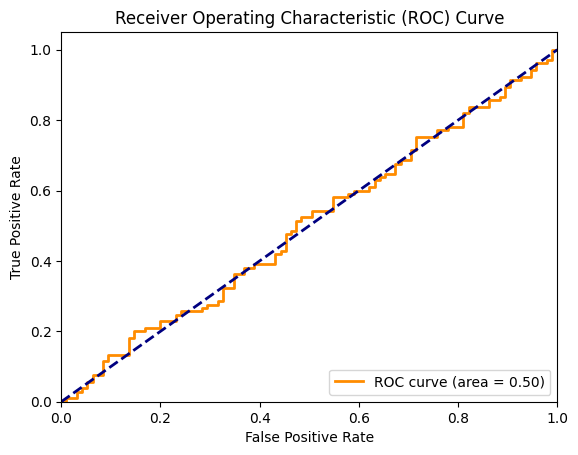

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# test_labels and test_preds are lists or arrays of true and predicted labels
print("Classification Report:\n", classification_report(test_labels, test_preds))
print("Confusion Matrix:\n", confusion_matrix(test_labels, test_preds))

# For ROC curve, we need predicted probabilities (not thresholded labels)
# test_probs contains model output probabilities for the positive class
fpr, tpr, thresholds = roc_curve(test_labels, test_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Step 6: Model Saving and Loading  
Saving the model. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

In [ ]:
# Save the model's state dictionary. More flexible & efficient 
# compared to saving the entire model object
torch.save(model.state_dict(), 'llm_model.pth')

# Load the model
model = LogisticRegression(input_dim)
model.load_state_dict(torch.load('llm_model.pth'))


# Ensure the loaded model is in evaluation mode
model.eval()


# Evaluate the loaded model
with torch.no_grad():
    test_preds = []
    test_labels = []
    test_probs = []
    test_loss = 0

    for X_batch, y_batch in test_loader:
        test_outputs = model(X_batch)
        test_probs.extend(test_outputs.numpy())
        loss = criterion(test_outputs, y_batch)
        test_loss += loss.item() * X_batch.size(0)

        predicted = (test_outputs > 0.5).long()
        test_preds.extend(predicted.numpy())
        test_labels.extend(y_batch.numpy())

    test_acc = accuracy_score(test_labels, test_preds)
    avg_test_loss = test_loss / len(test_loader.dataset)
    print("Accuracy on test set is", test_acc)


Accuracy on test set is 0.51


### Step 7: Hyperparameter Tuning  
  
Perform hyperparameter tuning to find the best learning rate. This fine-tuning is crucial for enhancing model performance. 

In [ ]:
## Different learning rates
lrs = [0.01, 0.05, 0.1]
best_lr = 0
acc = 0
for lr in lrs:
    model = LogisticRegression(input_dim)
    optimizer = optim.SGD(model.parameters(), lr = lr, weight_decay = 0.01)

    # Train the model
    epochs = 100

    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set
    test_labels = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            labels = (test_outputs > 0.5).long()
            test_labels.extend(labels.numpy())

    acc_score = accuracy_score(y_test, test_labels)
    if acc_score > acc:
        acc = acc_score
        best_lr = lr
    print('LR', lr, 'Accuracy', acc_score)
            
            
print('The optimal learning rate is', best_lr)

LR 0.01 Accuracy 0.51
LR 0.05 Accuracy 0.505
LR 0.1 Accuracy 0.51
The optimal learning rate is 0.01


### Step 8: Feature Importance  

 The weights of the logistic regression model represent the importance of each feature in making predictions. This helps understand the impact of each feature on the prediction. 

        Feature  Importance
3   gold_earned    0.169986
0         kills    0.122699
5  wards_placed    0.120335
4            cs   -0.008223
2       assists   -0.010555
1        deaths   -0.011218
7  damage_dealt   -0.020597
6  wards_killed   -0.031749


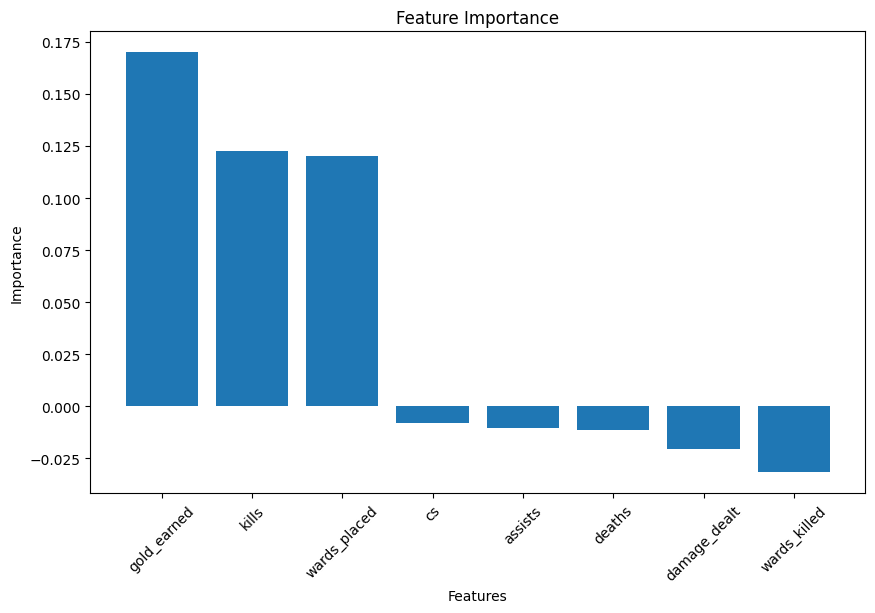

In [ ]:
# Extract the weights of the linear layer
weights = model.linear.weight.data.numpy().flatten()
features = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature':features, 'Importance':weights})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)
print(feature_importance)

#Plot feature importance 
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


#### Conclusion:  
This project uses the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.